# Notebook 1.

In [5]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,MALE
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,FEMALE
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,FEMALE


In [6]:
penguins = penguins[['flipper_length_mm', 'body_mass_g']]
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  342 non-null    float64
 1   body_mass_g        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [7]:
penguins.dropna(inplace=True)
penguins = penguins.reset_index(drop=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  342 non-null    float64
 1   body_mass_g        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


Text(0.5, 1.0, 'Body Mass as a function of the Flipper Length')

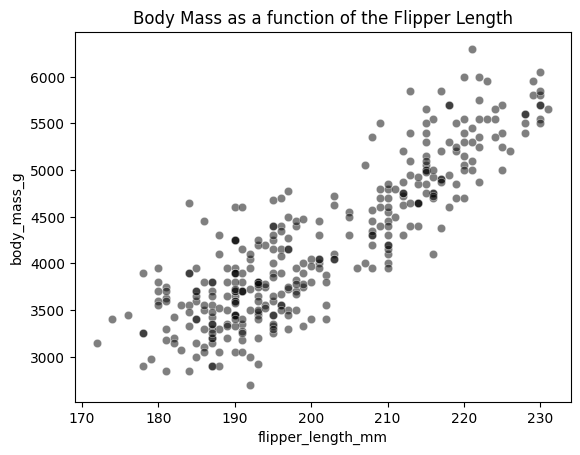

In [8]:
import seaborn as sns

feature_name = "flipper_length_mm"
target_name = "body_mass_g"
data, target = penguins[[feature_name]], penguins[target_name]

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.set_title("Body Mass as a function of the Flipper Length")

In [9]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

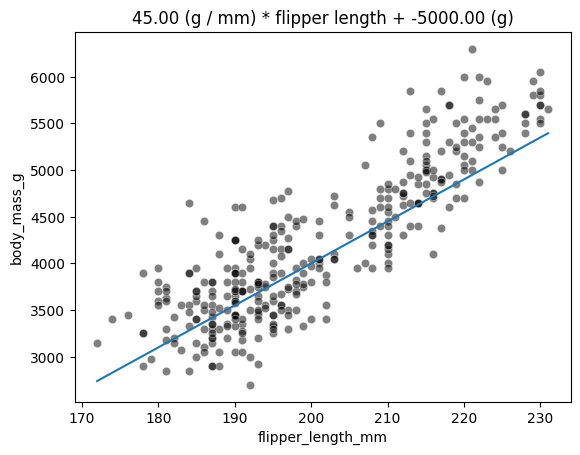

In [10]:
import numpy as np

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

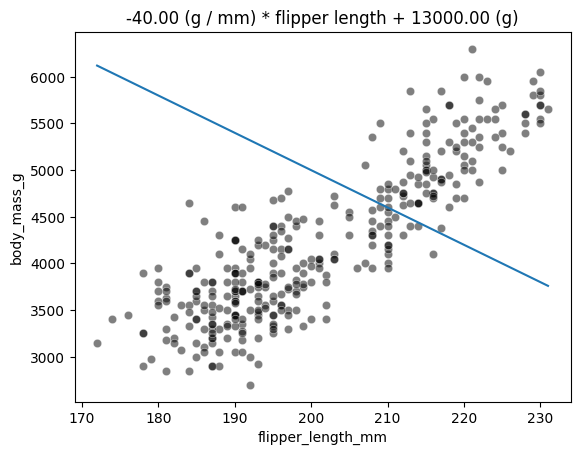

In [11]:
weight_flipper_length = -40
intercept_body_mass = 13000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

# Notebook 2.

In [2]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

penguins = penguins[['flipper_length_mm', 'body_mass_g']]
penguins.dropna(inplace=True)
penguins = penguins.reset_index(drop=True)
feature_name = "flipper_length_mm"
target_name = "body_mass_g"

data, target = penguins[[feature_name]], penguins[target_name]
penguins.head()

,flipper_length_mm,body_mass_g
0,181.00,3750.00
1,186.00,3800.00
2,195.00,3250.00
3,193.00,3450.00
4,190.00,3650.00


In [3]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [4]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610011

In [5]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077066

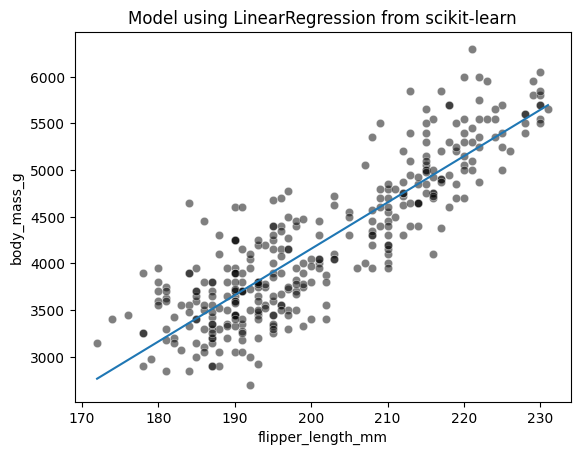

In [6]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass
)

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

In [7]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


A linear regression model minimizes the mean squared error on the training
set. This means that the parameters obtained after the fit (i.e. `coef_` and
`intercept_`) are the optimal parameters that minimizes the mean squared
error. In other words, any other choice of parameters would yield a model with
a higher mean squared error on the training set.

However, the mean squared error is difficult to interpret. The mean absolute
error is more intuitive since it provides an error in the same unit as the one
of the target.

In [8]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


# Notebook 3.

In [29]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# only keep the Adelie and Chinstrap classes
penguins = (
    penguins.set_index("species").loc[["Adelie", "Chinstrap"]].reset_index()
)
penguins = penguins[['species', 'flipper_length_mm', 'body_mass_g']].reset_index(drop=True)
penguins.dropna(inplace=True)
penguins.head()

,species,flipper_length_mm,body_mass_g
0,Adelie,181.00,3750.00
1,Adelie,186.00,3800.00
2,Adelie,195.00,3250.00
4,Adelie,193.00,3450.00
5,Adelie,190.00,3650.00


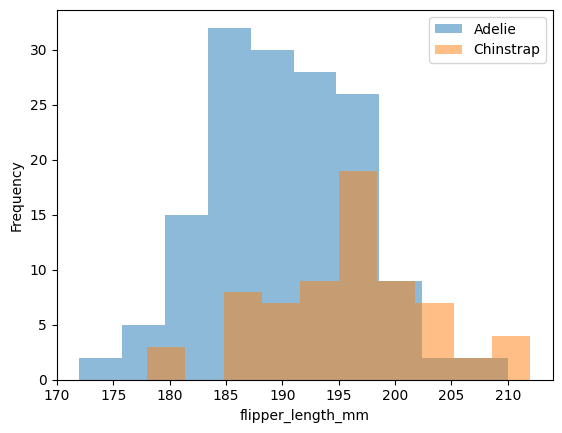

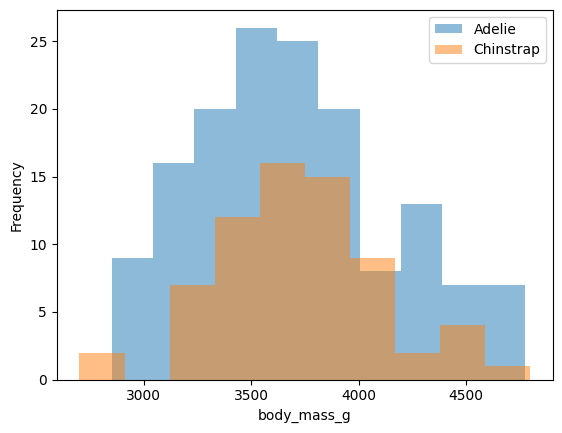

In [30]:
culmen_columns = ['flipper_length_mm', 'body_mass_g']
target_column = "species"


import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

In [31]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.618


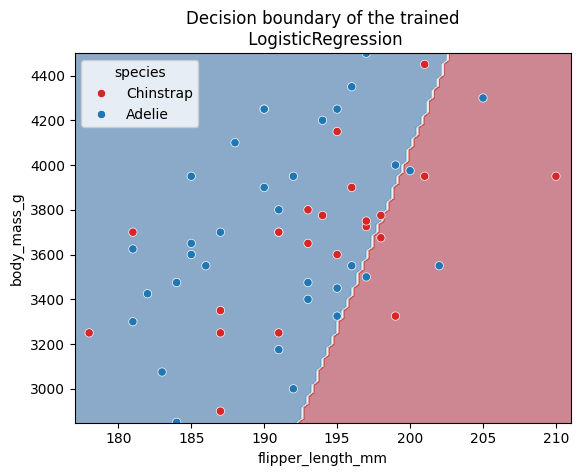

In [33]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [34]:
coefs = logistic_regression[-1].coef_[0]
weights = pd.Series(coefs, index=[f"Weight for '{c}'" for c in culmen_columns])
weights

Weight for 'flipper_length_mm'    1.42
Weight for 'body_mass_g'         -0.54
dtype: float64

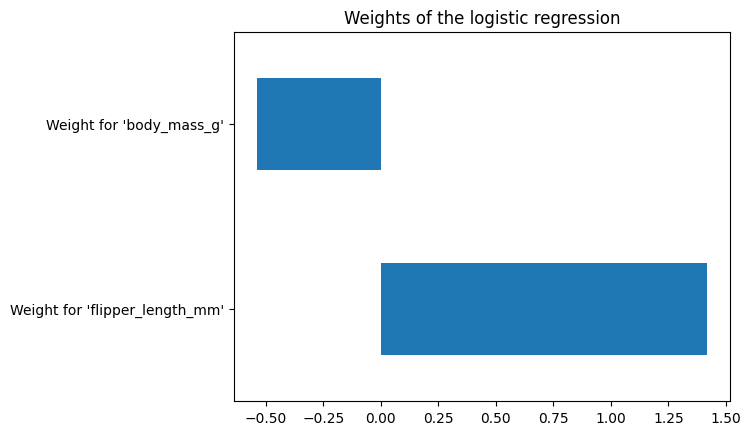

In [35]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

In [36]:
test_penguin = pd.DataFrame(
    {'flipper_length_mm': [45], 'body_mass_g': [17]}
)
logistic_regression.predict(test_penguin)

array(['Adelie'], dtype=object)

In [37]:
y_pred_proba = logistic_regression.predict_proba(test_penguin)
y_pred_proba

array([[1.00000000e+00, 1.75589318e-11]])

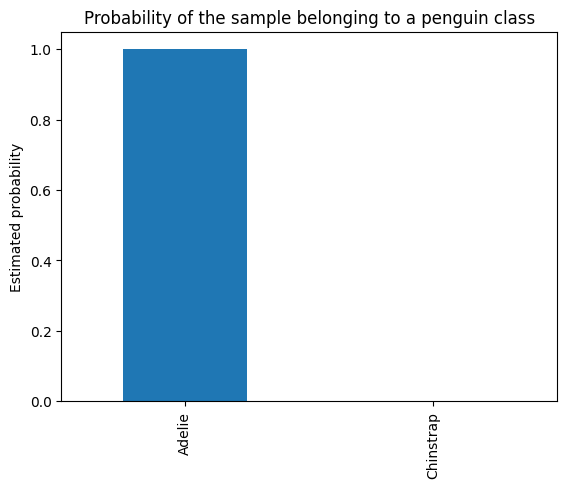

In [38]:
y_proba_sample = pd.Series(
    y_pred_proba.ravel(), index=logistic_regression.classes_
)
y_proba_sample.plot.bar()
plt.ylabel("Estimated probability")
_ = plt.title("Probability of the sample belonging to a penguin class")

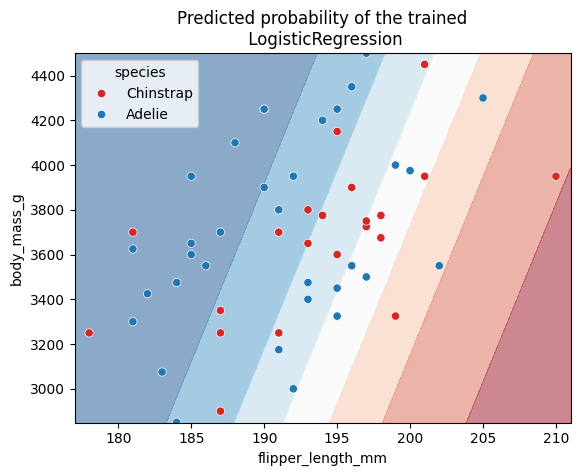

In [39]:
DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict_proba",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Predicted probability of the trained\n LogisticRegression")